<a href="https://colab.research.google.com/github/julianayuri/ReconhecimentoPadroes/blob/main/Atividade02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np


In [ ]:
diamonds = fetch_openml(name='diamonds', version=1)
X, y = diamonds.data, diamonds.target
X.shape, y.shape

((53940, 9), (53940,))

In [ ]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [ ]:
X = X.drop(columns=["cut", "color", "clarity"])
X.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [ ]:
X.dtypes

carat    float64
depth    float64
table    float64
x        float64
y        float64
z        float64
dtype: object

In [ ]:
model = LinearRegression()
model.fit(X,y)
model.score(X,y)

0.8592186831580986

In [ ]:
ypred = model.predict(X)
mean_squared_error(y, ypred)

2240581.7295427355

In [ ]:
coeficiente = model.coef_
coeficiente

array([10686.30908063,  -203.1540524 ,  -102.44565213, -1315.6678418 ,
          66.32160232,    41.62769701])

In [ ]:
intercept = model.intercept_
intercept

20849.31641304591

In [ ]:
delta = 1000

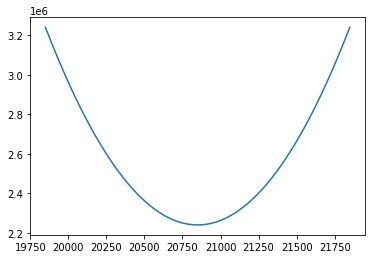

In [ ]:
intercepts = np.linspace(intercept - delta, intercept + delta, y.size)
mses = []
for inter in intercepts:
  model.intercept_ = inter
  ypred = model.predict(X)
  mse = mean_squared_error(y, ypred)
  mses.append(mse)
plt.plot(intercepts, mses)
plt.show()